In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("insurance.csv")

In [36]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [37]:
x = df.iloc[:,[0,1,2,3,5,6]]
y = pd.DataFrame(df.iloc[:,4])

In [38]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler

In [39]:
sc = StandardScaler()
le = LabelEncoder()
ohe = OneHotEncoder()

In [16]:
x.iloc[:,[0,2,5]] = sc.fit_transform(pd.DataFrame(x.iloc[:,[0,2,5]]))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [40]:
dff=pd.DataFrame(ohe.fit_transform(x.iloc[:,[1,4]]).toarray())
x = x.join(dff)

In [41]:
x.drop(x.columns[[1,4]],axis=1,inplace=True)

In [42]:
y = le.fit_transform(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
x.sample(2)

,age,bmi,children,charges,0,1,2,3,4,5
1141,41,32.60,3,7954.5170,1.0,0.0,0.0,0.0,0.0,1.0
702,53,41.47,0,9504.3103,0.0,1.0,0.0,0.0,1.0,0.0


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
xtr,xte,ytr,yte = train_test_split(x,y,test_size=0.3)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
model = KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)

In [48]:
model.fit(xtr,ytr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


KNeighborsClassifier()

In [49]:
ypred = model.predict(xte)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
cm = confusion_matrix(yte,ypred)

In [52]:
cm

array([[306,  10],
       [ 17,  69]])

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
acs = accuracy_score(yte,ypred)

In [55]:
acs

0.9328358208955224

In [56]:
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


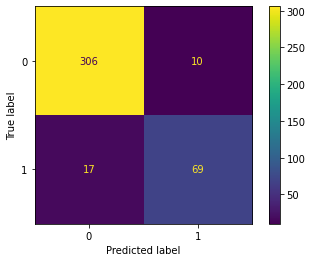

In [57]:
plot_confusion_matrix(model,xte,yte)

In [58]:
model.score(xte,yte)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.9328358208955224

In this example I observed that if standard scaling is not done accuracy will be a little higher.